# Gradient Descent: Multilayered Perceptron (MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

In [240]:
x = np.linspace(-5, 0).reshape(50,1)

In [241]:
def generate_sample(x):
    return np.array([np.sin(n) + np.random.normal(10, 0.1) for n in x])

In [242]:
y = generate_sample(x)

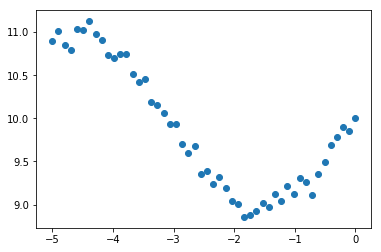

In [243]:
plt.scatter(x, y);

In [268]:
# number of neurons in hidden layer
p = 20

# initialize layer 0
W0 = np.random.random((1,p))
B0 = np.random.random((1,p))
# initialize layer 1
W1 = np.random.random((p,1))
B1 = np.random.random((1,1))

for e in range(100):
    #  *** FORWARD PROPAGATION ***
    # nx2 = (nx1 * 1x2) + (1x2)
    S0 = (x @ W0) + B0
    # nx2 = relu(nx2)
    A0 = np.maximum(0, S0)
    # nx1 = (nx2 * 2x1) + (1x1)
    y_hat = (A0 @ W1) + B1
    # 1x1
    mse = ((y - y_hat) ** 2).mean()
        
    #  *** BACKWARD PROPAGATION ***
    # nx1 = (nx1) * scalar
    b1_g = ((y - y_hat) * -1)
    # 1x1 = mean(nx1)
    b1_g = b1_g.mean().reshape(1,1)
    
    # nx2 = (nx1) * scalar * (nx2)
    w1_g = ((y - y_hat) * -1) * np.maximum(0, S0)
    # 2x1 = mean(nx2) of columns
    w1_g = w1_g.mean(axis=0).reshape(p,1)

    # nx2 = (nx1) * scalar * (nx2) == (nx2) * (1x2)
    b0_g = ((y - y_hat) * -1) * np.maximum(0, S0).astype('bool') * W1.T
    # 1x2 = mean(nx2) of columns
    b0_g = b0_g.mean(axis=0).reshape(1,p)
    
    # nx2 = (nx1) * scalar * (nx2) == (nx2) * (1x2) * (nx1)
    w0_g = ((y - y_hat) * -1) * np.maximum(0, S0).astype('bool') * W1.T * x
    # 1x2 = mean(nx2) of columns
    w0_g = w0_g.mean(axis=0).reshape(1,p)
    
    #  *** UPDATE GRADIENTS ***
    lr = 0.01
    B1 -= lr * b1_g
    W1 -= lr * w1_g
    B0 -= lr * b0_g
    W0 -= lr * w0_g
    
    if e % 10 == 0:
        print("mse: {:.2f}".format(mse))

mse: 48.37
mse: 0.37
mse: 0.19
mse: 0.11
mse: 0.06
mse: 0.04
mse: 0.03
mse: 0.03
mse: 0.03
mse: 0.03


In [269]:
def forward(x):
    S0 = (x @ W0) + B0
    A0 = np.maximum(0, S0)
    y_hat = (A0 @ W1) + B1
    return y_hat

In [270]:
y_hat = forward(x)

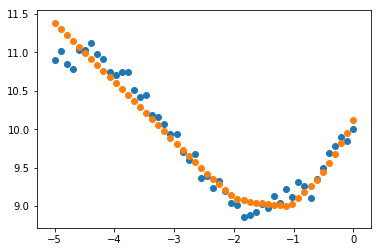

In [271]:
plt.scatter(x, y);
plt.scatter(x, y_hat);